<a href="https://colab.research.google.com/github/h-neal/Matt-Macarty-Algorithmic-Trading-Youtube-Series/blob/main/6_Quantitative_Stock_Price_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Quantitative Analysis of Price & Daily Returns**

  - Can returns be described with a normal distribution?
  - Is there a directional bias in daily change?
  - Can price movement be described as a random walk?

**1. Set up environment**

In [1]:
!pip install --upgrade yfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.9/117.9 kB 2.5 MB/s eta 0:00:00
  Attempting uninstall: yfinance
    Found existing installation: yfinance 0.2.59
    Uninstalling yfinance-0.2.59:
      Successfully uninstalled yfinance-0.2.59


In [30]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 8, 6
import seaborn as sb
sb.set()

import yfinance as yf

**2. Download stock price data, store in dataframe**

In [48]:
amzn = yf.download('AMZN')

[*********************100%***********************]  1 of 1 completed


**3. Take a look at the data**

In [49]:
amzn.head()

Price,Close,High,Low,Open,Volume
Ticker,AMZN,AMZN,AMZN,AMZN,AMZN
Date,,,,,
1997-05-15,0.097917,0.125000,0.096354,0.121875,1443120000
1997-05-16,0.086458,0.098958,0.085417,0.098438,294000000
1997-05-19,0.085417,0.088542,0.081250,0.088021,122136000
1997-05-20,0.081771,0.087500,0.081771,0.086458,109344000
1997-05-21,0.071354,0.082292,0.068750,0.081771,377064000


**4. Store instantaneous rate of return in separate series**

In [50]:
# if isinstance(amzn.columns, pd.MultiIndex):
#    amzn.columns = amzn.columns.get_level_values(0)

In [51]:
# amzn_close = amzn[['Close']].copy().reset_index()

In [52]:
# amzn_close['Close'] = amzn_close['Close'].astype(float)

In [53]:
amzn_close=amzn['Close'].copy()
amzn_close.head()

Ticker,AMZN
Date,
1997-05-15,0.097917
1997-05-16,0.086458
1997-05-19,0.085417
1997-05-20,0.081771
1997-05-21,0.071354


In [54]:
# amzn_return = amzn_close.copy()
amzn_return = round(np.log(amzn_close).diff() * 100, 2)
# amzn_return = amzn_return.diff()
amzn_return.head()

Ticker,AMZN
Date,
1997-05-15,NaN
1997-05-16,-12.45
1997-05-19,-1.21
1997-05-20,-4.36
1997-05-21,-13.63


**5. Plot the series**

<Axes: xlabel='Date'>

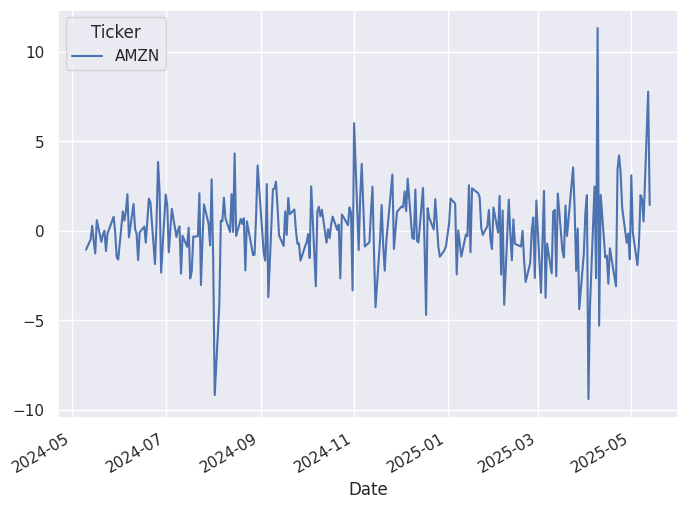

In [55]:
amzn_return[-252:].plot()

**6. Pandas describe function gives descriptive statistics, default assumes you are dealing with a sample. Pandas also deals with missing values by omitting them.**

In [56]:
amzn_return.dropna(inplace=True)
amzn_return.describe()

Ticker,AMZN
count,7042.000000
mean,0.109073
std,3.468964
min,-28.460000
25%,-1.300000
50%,0.040000
75%,1.450000
max,29.620000


**7. An alternative more slightly different table of descriptives fdrom scipy stats**

In [57]:
from scipy import stats

In [58]:
n, minmax, mean, var, skew, kurt = stats.describe(amzn_return)
mini, maxi = minmax
std = var ** .5

**8. For comparison generate random numbers that follow normal distribution**

In [59]:
from scipy.stats import norm

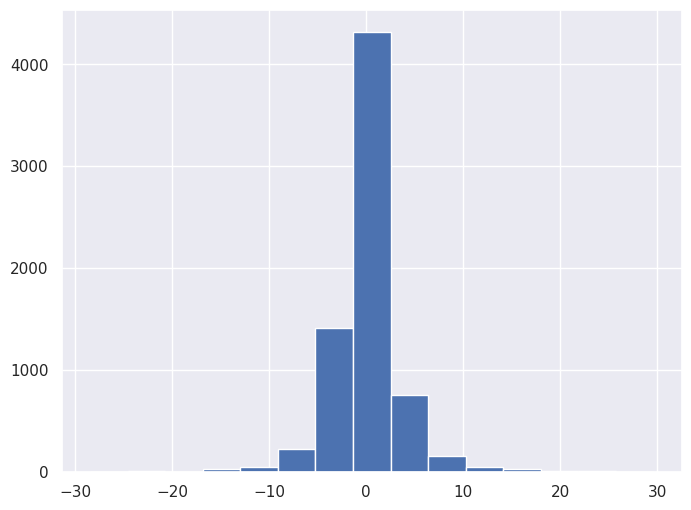

In [60]:
plt.hist(amzn_return, bins=15);

In [61]:
from scipy.stats import norm
x = norm.rvs(mean, std, n)

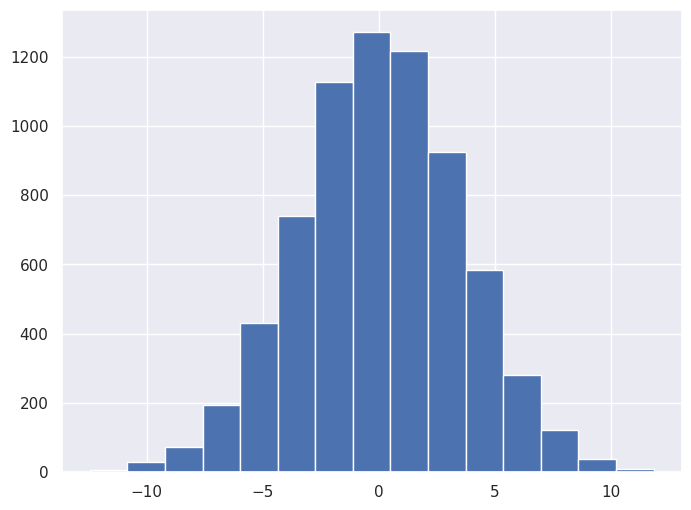

In [62]:
plt.hist(x, bins=15);

## **Is price change normally distributed?**

**10. Use scipy stats to test the kurtosis - the null hypothesis is that the sample is drawn from a population where the underlying kurtosis is that of a normally distributed variable**

In [63]:
x_test = stats.kurtosistest(x)
amzn_test = stats.kurtosistest(amzn_return)
print(f'{"Test statistic":20}{"p-value":>15}')
print(f'{" "*5}{"-"* 30}')
print(f"x:{float(x_test[0]):>17.2f}{float(x_test[1]):16.4f}")
print(f"AMZN:{float(amzn_test[0]):13.2f}{float(amzn_test[1]):16.4f}")

Test statistic              p-value
     ------------------------------
x:            -0.54          0.5874
AMZN:        34.69          0.0000


<ipython-input-63-2c0d9eb251d8>:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"AMZN:{float(amzn_test[0]):13.2f}{float(amzn_test[1]):16.4f}")


**11. Plot Histogram of price changes with normal curve overlay**

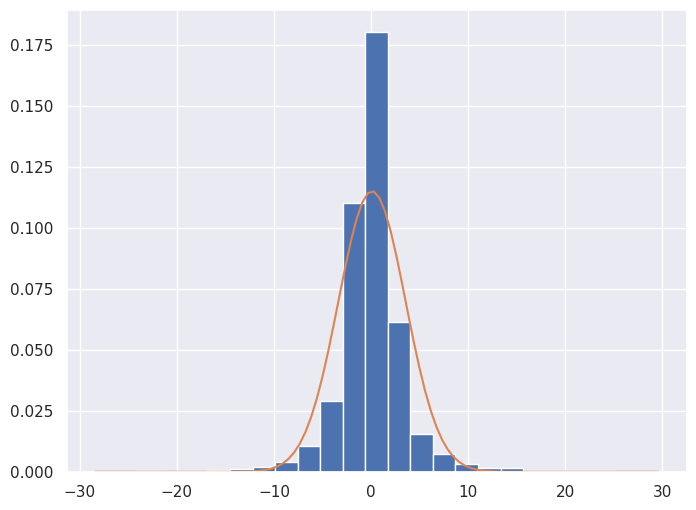

In [64]:
plt.hist(amzn_return, bins = 25, edgecolor= 'w', density=True)
overlay = np.linspace(mini, maxi, 100)
plt.plot(overlay, norm.pdf(overlay, mean, std));

## **Is daily price change significantly different from zero?**

**13. Conduct simple hypothesis test**

In [65]:
stats.ttest_1samp(amzn_return.sample(252), 0, alternative='two-sided')

TtestResult(statistic=array([0.43534984]), pvalue=array([0.66368263]), df=array([251]))

## **Can price movement be described as a random walk?**

**14. Create price lags**

In [74]:
if isinstance(amzn.columns, pd.MultiIndex):
   amzn.columns = amzn.columns.get_level_values(0)

In [75]:
amzn_close = amzn[['Close']].copy().reset_index()

In [76]:
amzn_close['Close'] = amzn_close['Close'].astype(float)

In [79]:
amzn_close['lag_1'] = amzn_close['Close'].shift(1)
amzn_close['lag_2'] = amzn_close['Close'].shift(2)
amzn_close.dropna(inplace=True)
amzn_close.head()

Price,Date,Close,lag_1,lag_2
2,1997-05-19,0.085417,0.086458,0.097917
3,1997-05-20,0.081771,0.085417,0.086458
4,1997-05-21,0.071354,0.081771,0.085417
5,1997-05-22,0.069792,0.071354,0.081771
6,1997-05-23,0.075000,0.069792,0.071354


**15. Fit linear model**

In [84]:
lr = np.linalg.lstsq(amzn_close[['lag_1', 'lag_2']], amzn_close['Close'], rcond = None)[0]

In [85]:
amzn_close['predict'] = np.dot(amzn_close[['lag_1', 'lag_2']], lr)
amzn_close.head()

Price,Date,Close,lag_1,lag_2,predict
2,1997-05-19,0.085417,0.086458,0.097917,0.086847
3,1997-05-20,0.081771,0.085417,0.086458,0.085484
4,1997-05-21,0.071354,0.081771,0.085417,0.081917
5,1997-05-22,0.069792,0.071354,0.081771,0.071705
6,1997-05-23,0.075000,0.069792,0.071354,0.069869


In [95]:
print(amzn_close.columns)
print(amzn_close.index.name)

Index(['Date', 'Close', 'lag_1', 'lag_2', 'predict'], dtype='object', name='Price')
None


<Axes: xlabel='Date'>

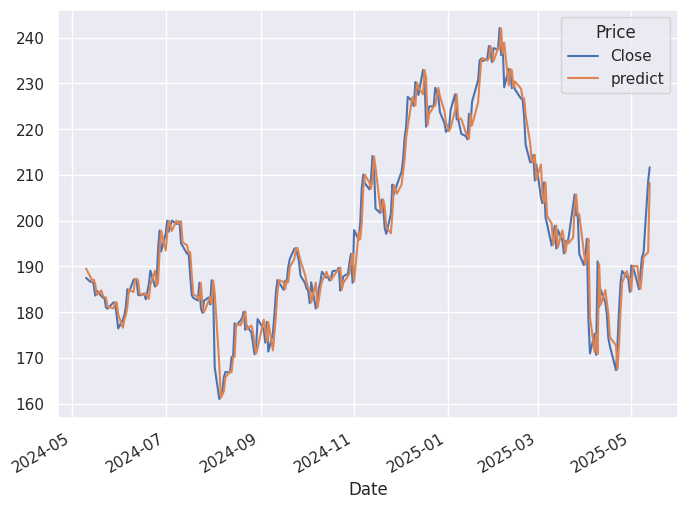

In [96]:
amzn_close.iloc[-252:][['Date', 'Close', 'predict']].plot(x='Date')